# Multi-Label Classification

## 1. EDA

In [35]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [36]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [37]:
data_path = "~/Documents/jigsaw-toxic-comment-classification-challenge/data/train.csv"

In [38]:
data_raw = pd.read_csv(data_path)

In [39]:
data_raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [40]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.1. Calculating number of comments under each label

In [41]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [42]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [43]:
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


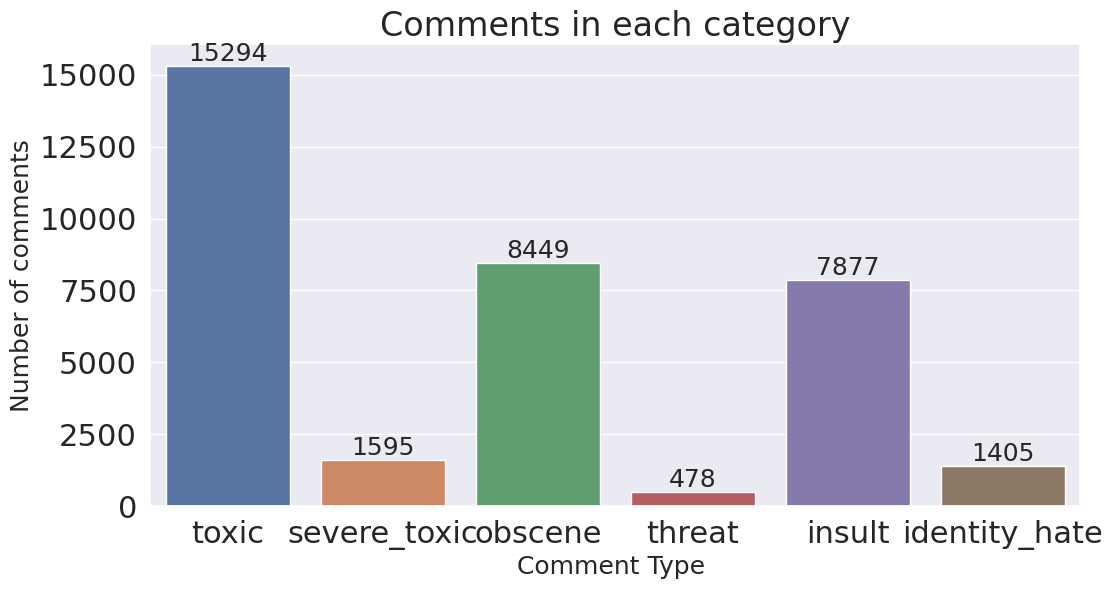

In [44]:
sns.set(font_scale = 2)
plt.figure(figsize=(12,6))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### 1.3. Calculating number of comments having multiple labels

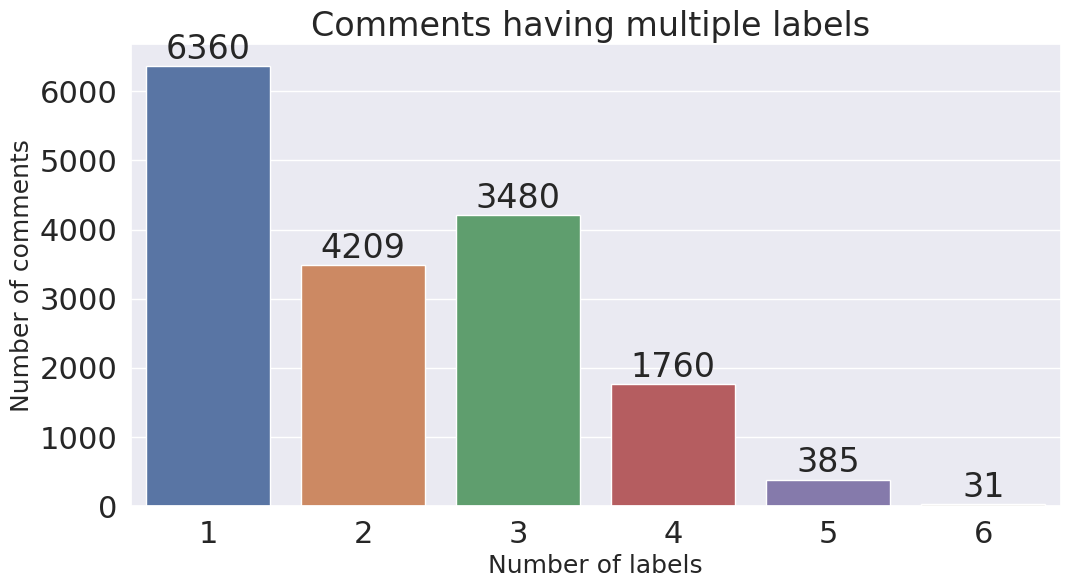

In [45]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

In [46]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

<Figure size 4000x2500 with 0 Axes>

<Figure size 4000x2500 with 0 Axes>

#### toxic

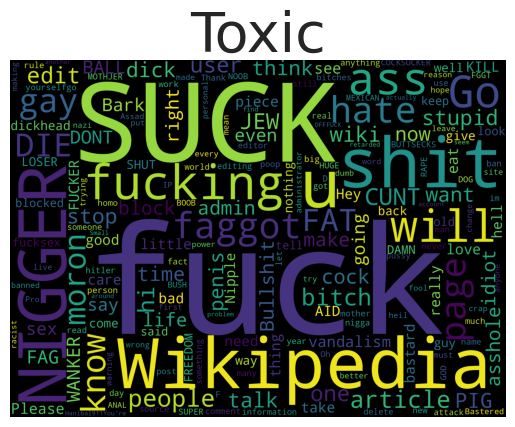

In [47]:

subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)

#### severe toxic

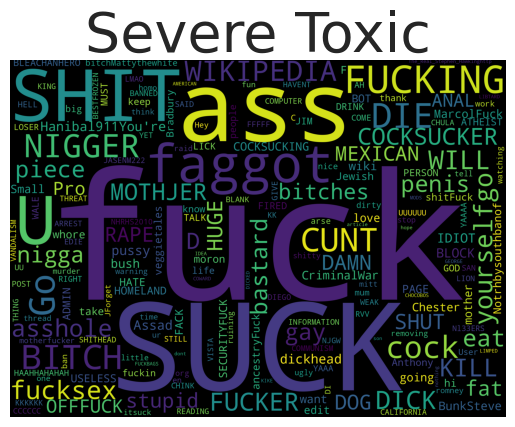

In [48]:
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

#### Obscene

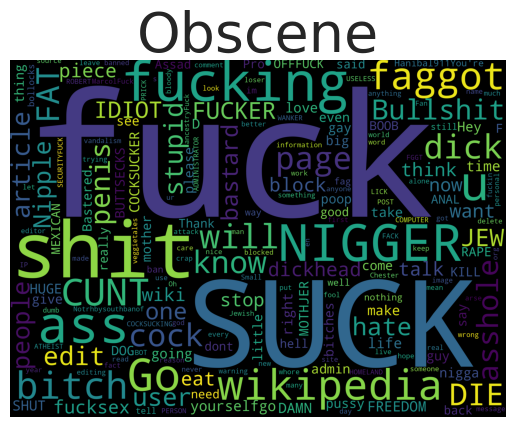

In [49]:
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)

#### threat

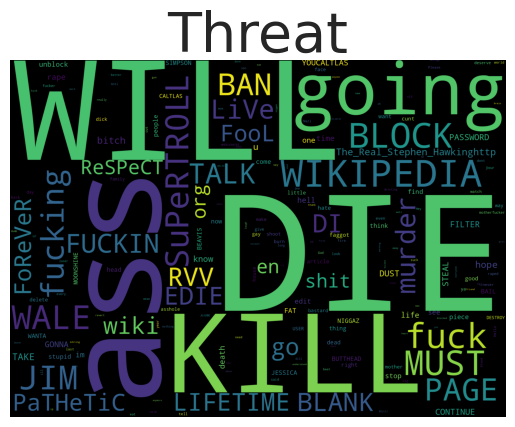

In [50]:

subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)

#### insult

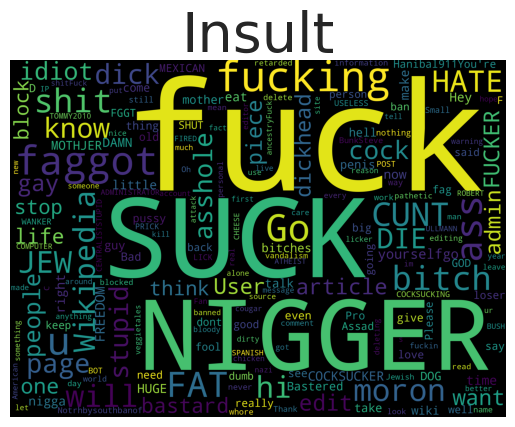

In [51]:
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)

#### indentity hate

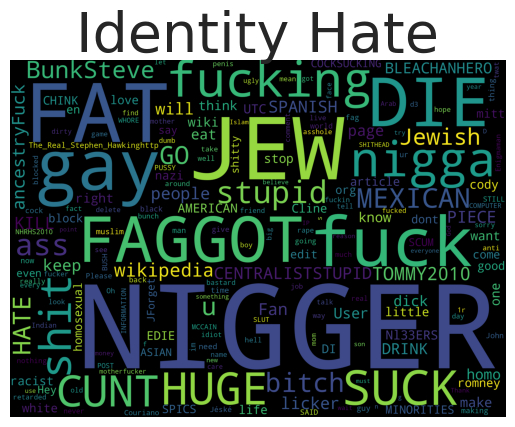

In [52]:
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

## 2. Data Pre-Processing

In [53]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [54]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [55]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
46359,7bd65c6bb7e7f001,genius when someone chooses an id like slimvir...,0,0,0,0,0,0
18585,310640fbe917bec8,i will attempt to respond to androidcats quest...,0,0,0,0,0,0
40845,6d02c856db11a7ed,human rights in israel you might be interested...,0,0,0,0,0,0
107611,3f41398b798bc28c,once you get to spanish monarchs and pretender...,0,0,0,0,0,0
91935,f5c5e79b6ce2fd79,except for the fact that nobody is debating th...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [56]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
46359,7bd65c6bb7e7f001,genius someone chooses id like slimvirgin ...,0,0,0,0,0,0
18585,310640fbe917bec8,attempt respond androidcats question dont...,0,0,0,0,0,0
40845,6d02c856db11a7ed,human rights israel might interested this,0,0,0,0,0,0
107611,3f41398b798bc28c,get spanish monarchs pretenders neither r...,0,0,0,0,0,0
91935,f5c5e79b6ce2fd79,except fact nobody debating drunk driving...,0,0,0,0,0,0


### 2.3. Stemming

In [57]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
46359,7bd65c6bb7e7f001,genius someon choos id like slimvirgin beg att...,0,0,0,0,0,0
18585,310640fbe917bec8,attempt respond androidcat question dont accus...,0,0,0,0,0,0
40845,6d02c856db11a7ed,human right israel might interest this,0,0,0,0,0,0
107611,3f41398b798bc28c,get spanish monarch pretend neither rule speci...,0,0,0,0,0,0
91935,f5c5e79b6ce2fd79,except fact nobodi debat drunk drive danger so...,0,0,0,0,0,0


### 2.4. Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [59]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5. TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [61]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [63]:
%%time

LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    LogReg_pipeline.fit(x_train, train[category])
    
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**

Test accuracy is 0.9133333333333333




**Processing severe_toxic comments...**

Test accuracy is 0.9916666666666667




**Processing obscene comments...**

Test accuracy is 0.9433333333333334




**Processing threat comments...**

Test accuracy is 0.995




**Processing insult comments...**

Test accuracy is 0.9516666666666667




**Processing identity_hate comments...**

Test accuracy is 0.9866666666666667


CPU times: user 90 ms, sys: 224 ms, total: 314 ms
Wall time: 2.16 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [64]:
%%time

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8883333333333333


CPU times: user 4.26 s, sys: 3.83 s, total: 8.09 s
Wall time: 8.16 s


### 3.3. Classifier Chains

In [65]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [66]:
%%time

classifier = ClassifierChain(LogisticRegression())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9066666666666666


CPU times: user 20 s, sys: 1.18 s, total: 21.2 s
Wall time: 21.3 s


### 3.4. Label Powerset

In [67]:
from skmultilearn.problem_transform import LabelPowerset

In [68]:
%%time

classifier = LabelPowerset(LogisticRegression())

classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)

print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9066666666666666


CPU times: user 1min 24s, sys: 154 ms, total: 1min 24s
Wall time: 1min 24s
